In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist= keras.datasets.mnist
(X_train_full , y_train_full) ,( X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


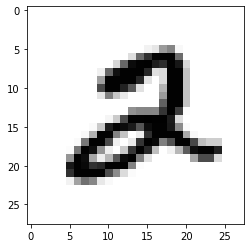

In [ ]:
digit = X_train_full[5]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.layers[1].name

'dense'

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30 , validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 0.0712 - val_accuracy: 0.9804
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0039 - accuracy: 0.9999 - val_loss: 0.0709 - val_accuracy: 0.9814
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0038 - accuracy: 0.9999 - val_loss: 0.0712 - val_accuracy: 0.9808
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.0712 - val_accuracy: 0.9810
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.0711 - val_accuracy: 0.9810
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.0718 - val_accuracy: 0.9812
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.0726 - val_accuracy:

In [ ]:
history.history

{'accuracy': [0.999927282333374,
  0.9999091029167175,
  0.999854564666748,
  0.999927282333374,
  0.9999091029167175,
  0.9999454617500305,
  0.9999454617500305,
  0.999963641166687,
  0.9999818205833435,
  0.999963641166687,
  0.9999818205833435,
  0.9999818205833435,
  0.9999818205833435,
  0.9999818205833435,
  0.999963641166687,
  0.9999818205833435,
  0.9999818205833435,
  0.9999818205833435,
  0.9999818205833435,
  0.9999818205833435,
  0.9999818205833435,
  0.9999818205833435,
  0.9999818205833435,
  0.999963641166687,
  0.9999818205833435,
  0.9999818205833435,
  0.9999818205833435,
  0.9999818205833435,
  0.9999818205833435,
  0.9999818205833435],
 'loss': [0.003995833452790976,
  0.0038822623901069164,
  0.003783145220950246,
  0.003624818054959178,
  0.0035596638917922974,
  0.0034488975070416927,
  0.003352092346176505,
  0.003268903587013483,
  0.0031870154198259115,
  0.0030960177537053823,
  0.0030180267058312893,
  0.0029495388735085726,
  0.00286276382394135,
  0.0028

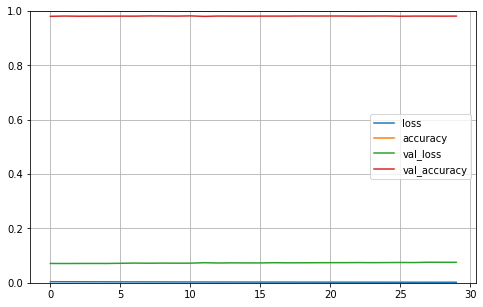

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 19.1788 - accuracy: 0.9761


[19.178810119628906, 0.9761000275611877]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
y_pred

array([7, 2, 1])

In [ ]:
import numpy as np

np.argmax(model.predict(X_new), axis=-1)

array([7, 2, 1])